In [2]:
import pandas as pd
from datetime import datetime
import datetime
import numpy as np
import scipy.stats as ss
from scipy.stats import norm, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

## Задание 1


### Imagine that you work for a company that develops mobile games. A manager came to you with a number of tasks to research several aspects of the mobile application. First of all, he is interested in the retention indicator. Write a function to calculate it. Retention is one of the most important indicators in a company. Your task is to write a function that will count the retention of players (by days from the date of registration of the player). The data is in the shared folder and has the following structure: reg_data.csv - data on the time of registration auth_data.csv - data on the time when users entered the game. The function must be written in python. During the solution, you can test the operation of the function both on the full dataset and on a part (sample) of data.

In [2]:
date_reg = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-frolova-23/shared/problem1-reg_data.csv'
                     , sep=';')
date_reg.head()

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5


In [3]:
date_auth = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-frolova-23/shared/problem1-auth_data.csv'
                      , sep=';')
date_auth.head()

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2


In [4]:
date_reg.isna().sum()

reg_ts    0
uid       0
dtype: int64

In [5]:
date_reg.describe()

,reg_ts,uid
count,1.000000e+06,1.000000e+06
mean,1.548332e+09,5.552354e+05
std,5.253653e+07,3.206011e+05
min,9.113822e+08,1.000000e+00
25%,1.528034e+09,2.776438e+05
50%,1.564454e+09,5.550455e+05
75%,1.585759e+09,8.329712e+05
max,1.600874e+09,1.110622e+06


In [6]:
date_reg.dtypes


reg_ts    int64
uid       int64
dtype: object

In [7]:
date_auth.isna().sum()

auth_ts    0
uid        0
dtype: int64

In [8]:
date_auth.describe()

,auth_ts,uid
count,9.601013e+06,9.601013e+06
mean,1.548778e+09,3.347198e+05
std,5.160527e+07,2.832669e+05
min,9.113822e+08,1.000000e+00
25%,1.528375e+09,9.599700e+04
50%,1.564577e+09,2.579210e+05
75%,1.585823e+09,5.190250e+05
max,1.600874e+09,1.110622e+06


In [9]:
date_auth.dtypes

auth_ts    int64
uid        int64
dtype: object

In [ ]:
First, we will build a pivot table by writing the main algorithm

In [10]:
#Date translation and formatting (leaving only the necessary columns) in the table
date_reg['reg_date'] = pd.to_datetime(date_reg['reg_ts'], unit='s').dt.date
date_reg = date_reg[['uid','reg_date']]
date_reg

,uid,reg_date
0,1,1998-11-18
1,2,1999-07-22
2,3,2000-01-13
3,4,2000-05-28
4,5,2000-09-16
...,...,...
999995,1110618,2020-09-23
999996,1110619,2020-09-23
999997,1110620,2020-09-23
999998,1110621,2020-09-23


In [11]:
#Date translation and formatting (leaving only the necessary columns) in the table
date_auth['auth_date'] = pd.to_datetime(date_auth['auth_ts'], unit='s').dt.date
date_auth = date_auth[['uid','auth_date']]
date_auth

,uid,auth_date
0,1,1998-11-18
1,2,1999-07-22
2,2,1999-07-25
3,2,1999-07-31
4,2,1999-08-05
...,...,...
9601008,1110618,2020-09-23
9601009,1110619,2020-09-23
9601010,1110620,2020-09-23
9601011,1110621,2020-09-23


In [12]:
#Merging tables
full_data = pd.merge(date_auth, datereg, on ='uid')

In [13]:
#Find the number of days between the authorization date and the registration date
full_data['days'] = (full_data['auth_date'] - full_data['reg_date']).dt.days + 1

In [14]:
full_data

,uid,reg_date,auth_date,days
0,1,1998-11-18,1998-11-18,1
1,2,1999-07-22,1999-07-22,1
2,2,1999-07-22,1999-07-25,4
3,2,1999-07-22,1999-07-31,10
4,2,1999-07-22,1999-08-05,15
...,...,...,...,...
9601008,1110618,2020-09-23,2020-09-23,1
9601009,1110619,2020-09-23,2020-09-23,1
9601010,1110620,2020-09-23,2020-09-23,1
9601011,1110621,2020-09-23,2020-09-23,1


In [15]:
#number of unique users grouped by registration date and days between authorization and registration
cogorta = full_data.groupby(['reg_date', 'days']).agg({'uid':'nunique'}).reset_index()
cogorta

,reg_date,days,uid
0,1998-11-18,1,1
1,1999-07-22,1,1
2,1999-07-22,4,1
3,1999-07-22,10,1
4,1999-07-22,15,1
...,...,...,...
2716223,2020-09-21,2,31
2716224,2020-09-21,3,49
2716225,2020-09-22,1,1641
2716226,2020-09-22,2,14


In [16]:
#Pivot the table
cogorta_1 = cogorta.pivot(index = 'reg_date', columns = 'days', values = 'uid')
cogorta_1

days,1,2,3,4,5,6,7,8,9,10,...,7702,7705,7707,7710,7713,7717,7721,7722,7728,7730
reg_date,,,,,,,,,,,,,,,,,,,,,
1998-11-18,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-07-22,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2000-01-13,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-28,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-16,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-19,1634.0,30.0,58.0,77.0,57.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-20,1636.0,40.0,71.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-21,1638.0,31.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#create a series containing the size of each cohort
cogort_group_size = cogorta_1[1]
cogort_group_size.head()

reg_date
1998-11-18    1.0
1999-07-22    1.0
2000-01-13    1.0
2000-05-28    1.0
2000-09-16    1.0
Name: 1, dtype: float64

In [18]:
#Divide the value of TotalUsers in cohorts by cohort_group_size.
#Change the data to show the return share of the original cohort size.
user_retention = cogorta_1.divide(cogort_group_size, axis=0)
user_retention

In [32]:
user_retention

days,1,2,3,4,5,6,7,8,9,10,...,7702,7705,7707,7710,7713,7717,7721,7722,7728,7730
reg_date,,,,,,,,,,,,,,,,,,,,,
1998-11-18,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-07-22,1.0,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2000-01-13,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-28,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-16,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-19,1.0,0.018360,0.035496,0.047124,0.034884,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-20,1.0,0.024450,0.043399,0.023839,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-21,1.0,0.018926,0.029915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's write a function with this algorithm and add visualization

In [6]:
def retention(datereg, dateauth):
    
    # Do a UNIX to date format conversion for further analysis
    datereg['reg_date'] = pd.to_datetime(date_reg['reg_ts'], unit='s').dt.date
    dateauth['auth_date'] = pd.to_datetime(date_auth['auth_ts'], unit='s').dt.date
    
    # Define the period for checking the operation of the function (the period can be set any within the data of the table, in the current version July'19)
    datereg = datereg[(datereg['reg_date'] >= datetime.date(2018,3,1))]
    dateauth = dateauth[(dateauth['auth_date'] <= datetime.date(2018,3,31))]

    # Combine data on registration and entry time of players to obtain a single table
    full_data  = pd.merge(dateauth, datereg, on='uid')
    
    # Calculate the difference in days from the time of registration to the time players enter
    full_data['days'] = (full_data['auth_date'] - full_data['reg_date']).dt.days + 1
    
    # We form cohorts of players
    #Number of unique users
    cogort = full_data.groupby(['reg_date', 'days'])['uid'].nunique().reset_index() 
    #Expand the table for the "cohort" view we need
    cogorts_1 = cogort.pivot(index='reg_date', columns='days', values='uid')
    #Create a series containing the size of each cohort
    cogort_group_size = cogorts_1[1]
    #Calculating retention rate
    user_retention = cogorts_1.divide(cogort_group_size, axis=0).round(3)
    
    #Visualization
    plt.figure(figsize=(18,14))
    plt.title('Retention')
    ax = sns.heatmap(data = user_retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.15)
    ax.set_yticklabels(user_retention.index)
    fig=ax.get_figure()
    plt.show()
     


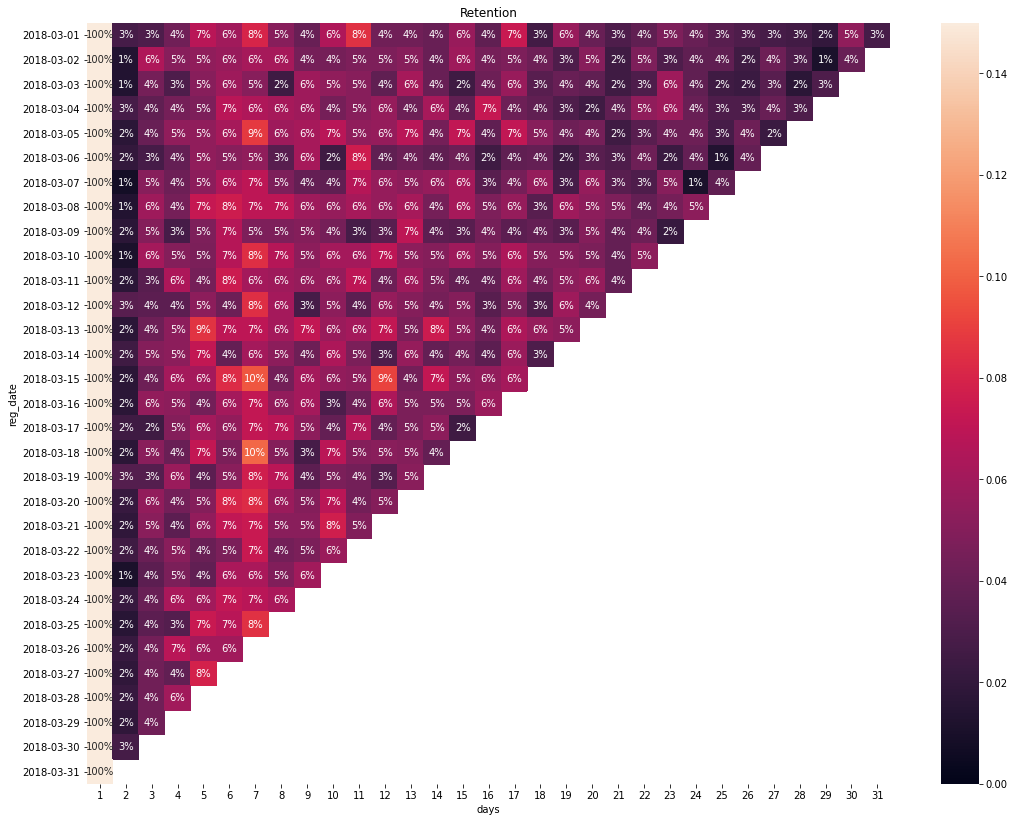

In [7]:
retention(date_reg, date_auth)

RR was analyzed within one month. It shows a weak return of players, and, accordingly, a lack of interest in the game.

## Задание 2


### An A/B test results are available in which two groups of users were offered different sets of promotional offers. It is known that ARPU in the test group is 5% higher than in the control group. At the same time, in the control group, 1928 players out of 202103 turned out to be paying, and in the test group - 1805 out of 202667. Which set of offers can be considered the best? What metrics should be analyzed to make the right decision and how?

#### EDA

In [3]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/1_Python/task2.csv',sep = ';')

In [4]:
df

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b
...,...,...,...
404765,404766,0,a
404766,404767,0,b
404767,404768,231,a
404768,404769,0,a


##### Exploration of control group A

In [5]:
#dataset with control group A
df_a = df[df.testgroup == 'a']

In [6]:
#Count the number of users in group A
df_a.agg({'testgroup':'count'})

testgroup    202103
dtype: int64

In [7]:
#Calculate ARPU for control group A
df_a.revenue.sum() / df_a.agg({'testgroup':'count'})

testgroup    25.41372
dtype: float64

In [8]:
#Count the number of paying users in group A
df_a[df_a.revenue != 0].count()

user_id      1928
revenue      1928
testgroup    1928
dtype: int64

In [9]:
# Calculate the total revenue for group A
df_a.revenue.sum()

5136189

In [10]:
df_a.isna().sum()

user_id      0
revenue      0
testgroup    0
dtype: int64

##### Exploration of control group B

In [11]:
#dataset with control group B
df_b = df[df.testgroup == 'b']

In [12]:
#Count the number of users in group B
df_b.agg({'testgroup':'count'})

testgroup    202667
dtype: int64

In [13]:
#Calculate ARPU for test group B
df_b.revenue.sum() / df_b.agg({'testgroup':'count'})

testgroup    26.751287
dtype: float64

In [14]:
#Count the number of paying users in group B
df_b[df_b.revenue != 0].count() 

user_id      1805
revenue      1805
testgroup    1805
dtype: int64

In [15]:
# Calculate the total revenue for group B
df_b.revenue.sum()

5421603

In [16]:
df_a.isna().sum()

user_id      0
revenue      0
testgroup    0
dtype: int64

In [17]:
#let's see descriptive statistics for both groups
df.groupby('testgroup').revenue.describe()

,count,mean,std,min,25%,50%,75%,max
testgroup,,,,,,,,
a,202103.0,25.413720,920.768137,0.0,0.0,0.0,0.0,37433.0
b,202667.0,26.751287,287.324162,0.0,0.0,0.0,0.0,4000.0


ARPU, ARPPU number of users, number of paying users

In [19]:
df_users = df.groupby('testgroup')\
    .agg({'user_id':'count'})\
    .rename(columns = {'user_id':'Users'})
df_users

,Users
testgroup,
a,202103
b,202667


In [20]:
df_pay_users = df[df.revenue>0].groupby('testgroup')\
    .agg({'user_id':'count'})\
    .rename(columns = {'user_id':'Paying_users'})
df_pay_users

,Paying_users
testgroup,
a,1928
b,1805


In [21]:
df_rev = df.groupby('testgroup')\
    .agg({'revenue':'sum'})
df_rev

,revenue
testgroup,
a,5136189
b,5421603


In [22]:
df_ARPU = df.groupby('testgroup')\
    .agg({'revenue':'mean'})\
    .rename(columns = {'revenue':'ARPU'})
df_ARPU

,ARPU
testgroup,
a,25.413720
b,26.751287


In [23]:
df_ARPPU = df[df.revenue > 0].groupby('testgroup')\
    .agg({'revenue':'mean'})\
    .rename(columns = {'revenue':'ARPPU'})
df_ARPPU

,ARPPU
testgroup,
a,2663.998444
b,3003.658172


In [24]:
df_median = df[df.revenue > 0].groupby('testgroup')\
    .agg({'revenue':'median'})\
    .rename(columns = {'revenue':'median'})
df_median

,median
testgroup,
a,311
b,3022


In [25]:
#Combine all the necessary data into one table
data = df_users.merge(df_pay_users, on = 'testgroup')
data = data.reset_index()
data = data.merge(df_rev, on = 'testgroup')
data = data.merge(df_ARPU, on = 'testgroup')
data = data.merge(df_ARPPU, on = 'testgroup')
data = data.merge(df_median, on = 'testgroup')
data

,testgroup,Users,Paying_users,revenue,ARPU,ARPPU,median
0,a,202103,1928,5136189,25.413720,2663.998444,311
1,b,202667,1805,5421603,26.751287,3003.658172,3022


As can be seen from the table, the median values differ greatly (by a factor of 10), despite the fact that the average values are approximately similar - this indicates outliers and a non-normal distribution.
For clarity, let's look at the values on the graph.

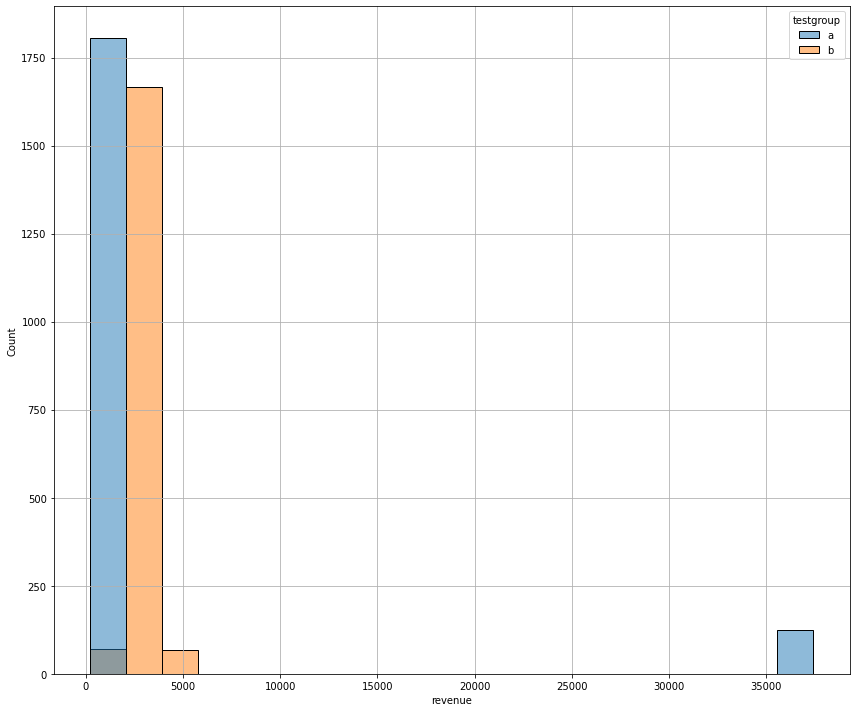

In [26]:
plt.figure(figsize=(12,10))
sns.histplot(df[df.revenue> 0],x = 'revenue', hue = 'testgroup', bins = 20)
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

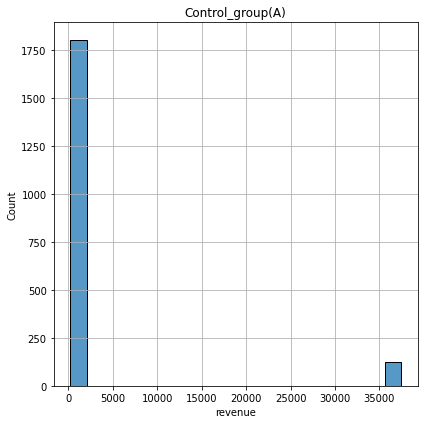

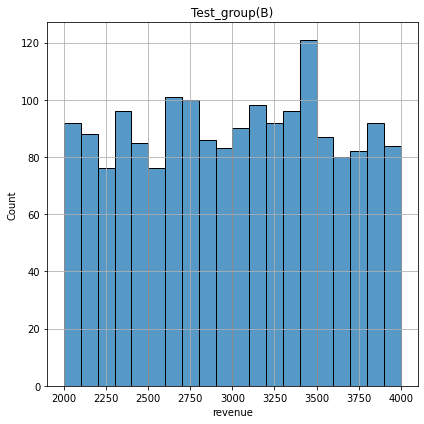

In [27]:
#Paying users from group A
plt.figure(figsize=(6,6))
plt.title('Control_group(A)')
sns.histplot(df_a[df_a.revenue> 0],x = 'revenue', bins = 20)
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
#Paying users from group B
plt.figure(figsize=(6,6))
plt.title('Test_group(B)')
sns.histplot(df_b[df_b.revenue> 0],x = 'revenue', bins = 20)
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

Judging by the graphs, it is clear that in the control group (A) there are users who spend a lot, in comparison with others, let's call them whales (Whales).

In [28]:
#Let's look at our whales by filtering revenue above 5000
df_whales = df_a[df_a.revenue > 5000]
df_whales

,user_id,revenue,testgroup
416,417,37324,a
4428,4429,37304,a
5777,5778,37315,a
8065,8066,37307,a
8743,8744,37334,a
...,...,...,...
360696,360697,37347,a
378668,378669,37297,a
389341,389342,37298,a
394580,394581,37302,a


In [29]:
df_whales.describe()

,user_id,revenue
count,123.000000,123.000000
mean,203513.073171,37319.121951
std,116745.137742,25.442183
min,417.000000,37293.000000
25%,109013.500000,37301.000000
50%,204560.000000,37311.000000
75%,317108.500000,37329.000000
max,399295.000000,37433.000000


Let's build graphs: control group, control group without whales, test group.

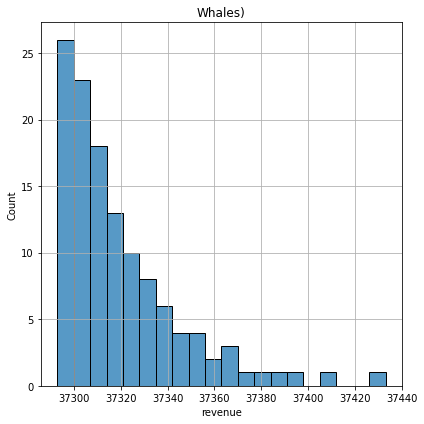

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


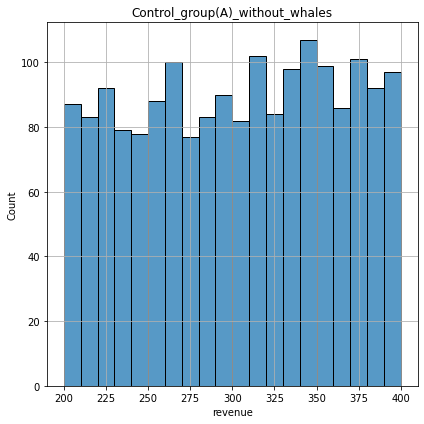

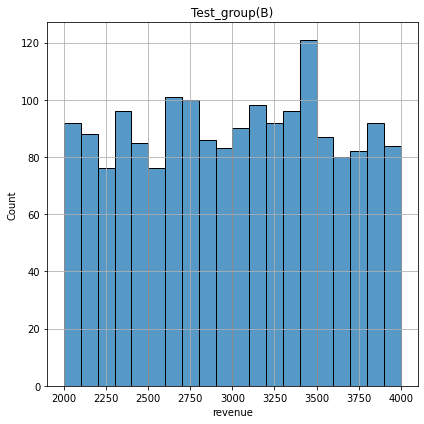

In [31]:
#whale distribution graph
plt.figure(figsize=(6,6))
plt.title('Whales)')
sns.histplot(df_whales,x = 'revenue', bins = 20)
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
#graph of the control group without whales
plt.figure(figsize=(6,6))
plt.title('Control_group(A)_without_whales')
sns.histplot(df_a[(df_a.revenue < 5000) & (df.revenue > 0)],x = 'revenue', bins = 20)
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
#test group graph
plt.figure(figsize=(6,6))
plt.title('Test_group(B)')
sns.histplot(df_b[df_b.revenue >0],x = 'revenue', bins = 20)
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

At first glance it seems that whales in the control group account for more than 80% of the group's revenue. This needs to be checked.

In [32]:
#For "whales" we will take the same sign (revenue more than 5000)
(df_a[df_a.revenue > 5000].revenue.sum() / df_a.revenue.sum()) * 100

89.37077665950378

As you can see, almost 90% of the revenue in the control group comes from whales, the number of which is only 123 out of 202 thousand (0.06%) - which indicates an abnormal distribution in the control group (confirmed by graphs as well)

Compare group metrics, without whales

In [33]:
df_without_whales = df[df.revenue < 5000]
df_without_whales

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b
...,...,...,...
404765,404766,0,a
404766,404767,0,b
404767,404768,231,a
404768,404769,0,a


In [34]:
#ARPU
df_without_whales_ARPU = df_without_whales.groupby('testgroup')\
    .agg({'revenue':'mean'})\
    .rename(columns = {'revenue':'ARPU'})
df_without_whales_ARPU

,ARPU
testgroup,
a,2.702926
b,26.751287


Now let's compare ARPPU

In [35]:
#ARPPU 
df_without_whales_ARPPU = df_without_whales[df_without_whales.revenue > 0].groupby('testgroup')\
    .agg({'revenue':'mean'})\
    .rename(columns = {'revenue':'ARPPU'})
df_without_whales_ARPPU

,ARPPU
testgroup,
a,302.458172
b,3003.658172


As we can see, if we remove the whales, the results differ by 10 times, but we cannot consider them outliers, because they account for too much revenue.

To finally draw conclusions, we will test for statistical significance. Given the non-normality of the distribution, we can apply Bootstrap or the Munny Whitney test

In [229]:
#Munny Whitney
mannwhitneyu(df_a.revenue, df_b.revenue)

MannwhitneyuResult(statistic=20491259376.0, pvalue=0.06269701316074398)

According to the Mann-Whitney pvalue=0.063, this is greater than 0.05, which does not allow us to reject H0.
One of the conditions of the Mann-Whitney test is "similar values in the sample should be minimized", which cannot be said exactly about our data, which means that this method does not give us an exact answer.
Let's use the Bootstrap method.

In [257]:
# Declare a function that will allow us to test hypotheses using the bootstrap (#MEAN)
def get_bootstrap(
    data_column_1, # numeric values of the first sample
    data_column_2, # numeric values of the second sample
    boot_it = 1000, # number of bootstrap subsamples
    statistic = np.mean, # statistics we are interested in
    bootstrap_conf_level = 0.95 # significance level
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # extract subsamples
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # return parameter
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) #mean() - apply statistics
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Visualization
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

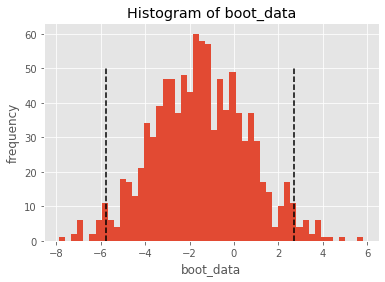

In [258]:
booted_data_mean = get_bootstrap(
    df_a.revenue,
    df_b.revenue
    )

In [259]:
 booted_data_mean["p_value"].round(2)

0.48

In [260]:
booted_data_mean["ci"]

,0
0.025,-5.754803
0.975,2.712338


P-value is greater than 0.05, which means we cannot reject H0.

1) We conclude that there are no statistically significant differences between the ARPU of the two groups.
2) To the question "Which set of proposals can be considered the best?" we can’t say for sure, because there are no statistical differences, but we got this result due to the presence of whales in the control group.
3) We cannot discard whales as outliers, because there are 123 of them, which indicates the non-randomness of their appearance, namely, the confirmation of the theory that these are whales.
4) To make a decision, metrics such as ARPU and ARPPU (with and without whales) were analyzed. For group metrics without whales, the scores differ by a factor of 10, but again we cannot discard whales as outliers.
5) It would also be possible to analyze LTV and conversion, and if LTV was high, then it would be better to leave the group with a higher conversion.
6) In conclusion, we can say that the set of promotional offers did not have a statistically significant impact on the studied metrics (ARPU and ARPPU).